# Importing Headers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import calendar
plt.style.use("ggplot")

## Importing Datasets

In [2]:
data1 =pd.read_csv("processed_individual_cases_Sep20th2020.csv")
data2 =pd.read_csv("processed_location_Sep20th2020.csv")

## Exploratory Data `Analing`

In [59]:
describe= data2.describe()
describe.drop(['Lat','Long_'],axis=1)

describe= data2.describe()
#describe.drop(['Lat','Long_'],axis=1)
describe =describe.drop(['Incidence_Rate','Case-Fatality_Ratio'],axis=1)

describe

,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
count,3.954000e+03,3954.000000,3.954000e+03,3.952000e+03,3874.000000,3906.000000
mean,7.760496e+03,241.740769,5.291398e+03,2.228632e+03,1538.572813,2.355818
std,4.184036e+04,1476.661533,5.315287e+04,4.440693e+04,1368.457332,3.538503
min,0.000000e+00,0.000000,0.000000e+00,-2.577446e+06,0.000000,0.000000
25%,1.370000e+02,1.000000,0.000000e+00,1.140000e+02,618.904146,0.637729
50%,4.985000e+02,9.000000,0.000000e+00,4.210000e+02,1204.351179,1.633422
75%,2.129000e+03,48.000000,0.000000e+00,1.453000e+03,2097.993633,3.006621
max,1.167496e+06,37076.000000,2.577446e+06,3.379130e+05,14871.183644,108.812950


,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,3874.000000,3874.000000,3.954000e+03,3954.000000,3.954000e+03,3.952000e+03
mean,35.987924,-72.337046,7.760496e+03,241.740769,5.291398e+03,2.228632e+03
std,12.872793,53.019022,4.184036e+04,1476.661533,5.315287e+04,4.440693e+04
min,-52.368000,-174.159600,0.000000e+00,0.000000,0.000000e+00,-2.577446e+06
25%,33.270421,-96.611164,1.370000e+02,1.000000,0.000000e+00,1.140000e+02
50%,37.938284,-86.878438,4.985000e+02,9.000000,0.000000e+00,4.210000e+02
75%,42.158587,-77.639009,2.129000e+03,48.000000,0.000000e+00,1.453000e+03
max,71.706900,178.065000,1.167496e+06,37076.000000,2.577446e+06,3.379130e+05


## Data Cleaning

### How many values are `Null` ?

In [70]:
data1.isnull().sum()

age                       296874
sex                       293734
province                    6568
country                       24
latitude                       2
longitude                      2
date_confirmation            462
additional_information    522969
source                    209191
outcome                        0
dtype: int64

In [71]:
data2.isnull().sum()

Province_State         168
Country_Region           0
Last_Update              0
Lat                     80
Long_                   80
Confirmed                0
Deaths                   0
Recovered                0
Active                   2
Combined_Key             0
Incidence_Rate          80
Case-Fatality_Ratio     48
dtype: int64

`Age`

In [72]:
dfAge = data1.dropna(axis=0,subset=['age']).reset_index(drop=True)

## PLOTS

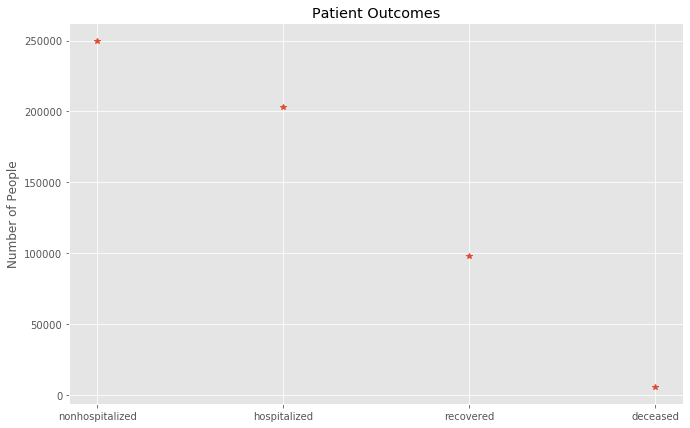

In [78]:
# outcomes plot
outcomeCount = data1['outcome'].value_counts()
plt.figure(figsize=(11, 7))
plt.plot(outcomeCount,"*")
plt.title("Patient Outcomes")
plt.ylabel('Number of People')
plt.savefig("outcomesCount.png")

Total cases by gender:
male      145583
female    118047
Name: sex, dtype: int64


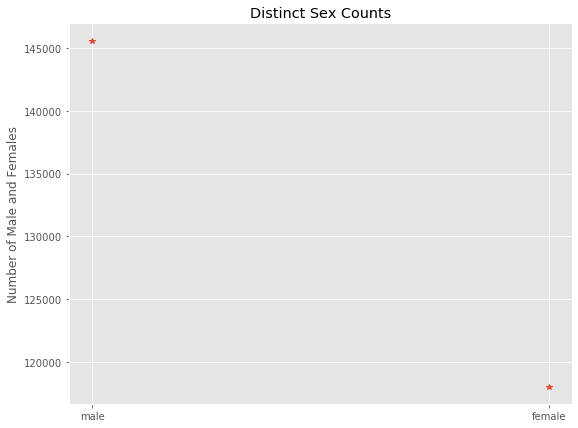

In [79]:
# Sex
sexCount = data1['sex'].value_counts()
plt.figure(figsize=(9, 7))
plt.plot(sexCount,"*")
plt.title("Distinct Sex Counts")
plt.ylabel("Number of Male and Females")
plt.savefig("sexCount.png")
print("Total cases by gender:")
print(sexCount)

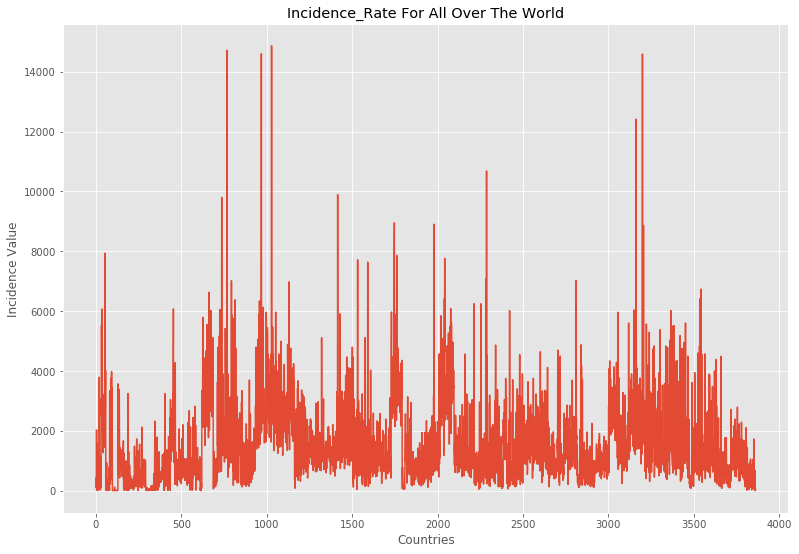

In [81]:
## Incidence_Rate
telly = data2['Incidence_Rate'].unique()
plt.figure(figsize=(13, 9))
plt.plot(telly)
plt.title("Incidence_Rate For All Over The World")
plt.xlabel("Countries")
plt.ylabel("Incidence Value")
plt.savefig("IncidenceRate.png")

Case-Fatality_Ratio mean :  2.355817632664569
Case-Fatality_Ratio max :  108.81294964028775


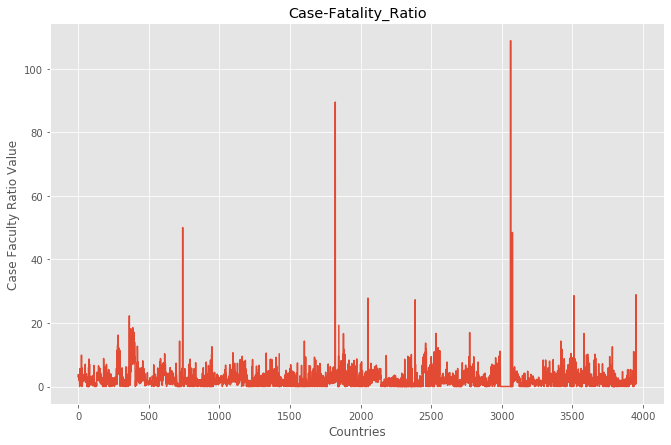

In [82]:
## Case-Fatality_Ratio
plt.figure(figsize=(11, 7))
plt.plot(data2['Case-Fatality_Ratio'])
plt.title("Case-Fatality_Ratio")
plt.xlabel('Countries')
plt.ylabel('Case Faculty Ratio Value')
plt.savefig("Case-Fatality_Ratio.png")

print("Case-Fatality_Ratio mean : ", np.mean(data2['Case-Fatality_Ratio']))
print("Case-Fatality_Ratio max : ", np.max(data2['Case-Fatality_Ratio']))

Mean Deaths :  241.7407688416793
Max Deaths :  37076


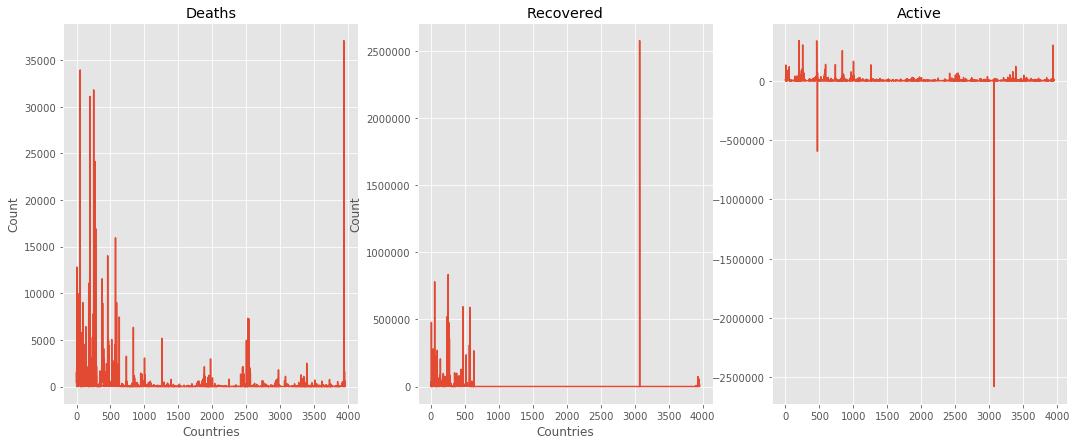

In [83]:
## Deaths
plt.figure(figsize=(18, 7))
plt.subplot(1, 3, 1)
plt.plot(data2['Deaths'])
plt.title("Deaths")
plt.xlabel('Countries')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.plot(data2['Recovered'])
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title("Recovered")
plt.subplot(1, 3,3)
plt.plot(data2['Active'])
plt.title("Active")
plt.savefig("Deaths.png")

print("Mean Deaths : ", np.mean(data2['Deaths']))
print("Max Deaths : ", np.max(data2['Deaths']))

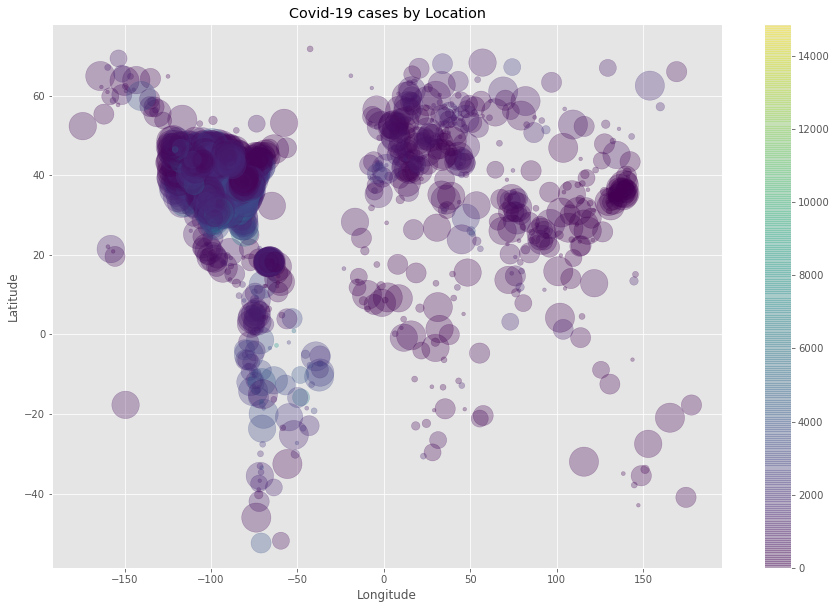

In [84]:
temp = data2['Incidence_Rate'].values.tolist()
plt.figure(figsize=(15,10))
N=10
area = (30 * np.random.rand(N))**2
plt.scatter(x=data2['Long_'], y=data2['Lat'], s=area, c=temp, alpha = 0.3)
plt.title('Covid-19 cases by Location')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
plt.savefig('HeatMap_bylocation.jpg')

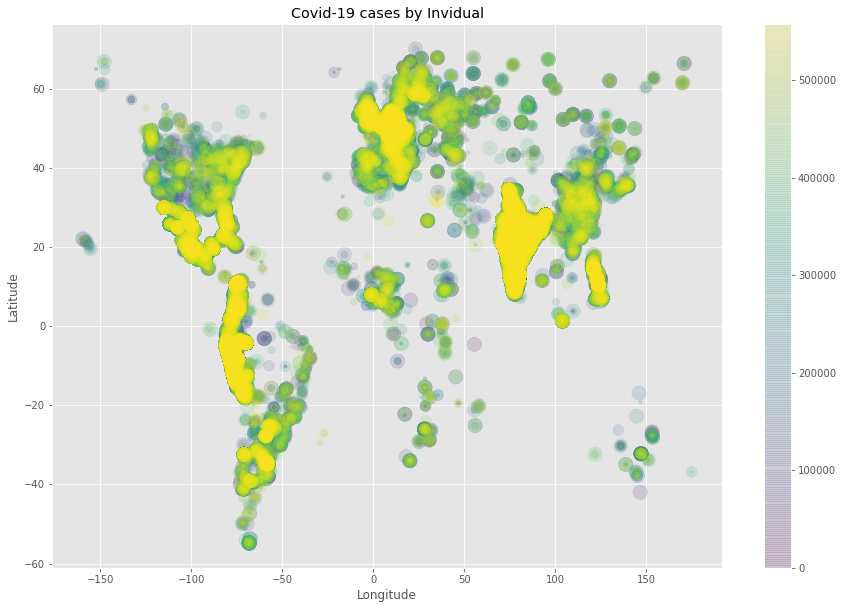

In [85]:
temp = data1.index.values.tolist()
plt.figure(figsize=(15,10))
N=5
area = (15 * np.random.rand(N))**2
plt.scatter(x=data1['longitude'], y=data1['latitude'], s=area, c=temp, alpha = 0.15)
plt.title('Covid-19 cases by Invidual')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
plt.savefig('HeatMap_by_individual.jpg')

# `Date Cleaning FOR DATE FEATURE`

In [86]:
def arrange_dates(tempdata):
    
    if(tempdata=='06.03.2020 - 09.03.2020'):
        tempdata='06.03.2020'
    elif(tempdata=='06.03.2020-13.03.2020' or tempdata == '06.03.2020 - 08.03.2020'):
        tempdata='06.03.2020'
    elif (tempdata=='07.03.2020 - 13.03.2020'):
        tempdata='07.03.2020'
    elif (tempdata=='25.02.2020 - 03.03.2020' or tempdata == '25.02.2020 - 26.02.2020') :
        tempdata='25.02.2020'
    
    elif (tempdata=='12.03.2020 - 13.03.2020' or tempdata == '12.03.2020-14.03.2020'):
        tempdata='12.03.2020'
        
    elif (tempdata=='10.03.2020 - 11.03.2020' or tempdata == '10.03.2020-13.03.2020' or tempdata == '10.03.2020 - 12.03.2020'):
        tempdata='10.03.2020'
          
    elif(tempdata== '07.03.2020 - 09.03.2020' or tempdata == '07.03.2020-09.03.2020' or tempdata == '07.03.2020 - 10.03.2020'):
        tempdata= '07.03.2020'
            
    elif (tempdata=='05.03.2020-06.03.2020'):
        tempdata='05.03.2020'
    elif (tempdata=='18.03.2020-19.03.2020'):
        tempdata='18.03.2020'
      
    return tempdata
        
data1["newdate"] = data1['date_confirmation'].apply(arrange_dates)
data1["newdate"]  = pd.to_datetime(data1["newdate"])

In [87]:
data1["month"] = pd.to_datetime(data1['newdate'], format='%m').dt.month_name().str.slice(stop=3)

Total cases by gender:
May    277345
Apr     91423
Mar     53922
Jan     24746
Jun     15631
Jul     14084
Dec     13783
Feb     13722
Nov     13696
Oct     13503
Sep     12726
Aug     12321
Name: month, dtype: int64


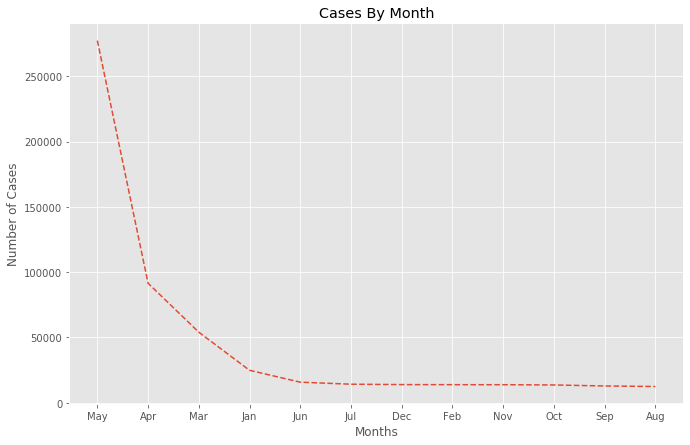

In [89]:
# Curve plot
caseByMonth = data1["month"].value_counts()
plt.figure(figsize=(11, 7))
plt.plot(caseByMonth, "--")
plt.title("Cases By Month")
plt.xlabel('Months')
plt.ylabel('Number of Cases')
plt.savefig("CasesByMonth.png")

print("Total cases by gender:")
print(caseByMonth)